In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

In [12]:
df = pd.read_csv("../data/classification/classification-train.csv")

In [13]:
df.head()

,Site,Timestamp_Local,Dry_Bulb_Temperature_C,Global_Horizontal_Radiation_W/m2,Building_Power_kW,Demand_Response_Flag,Demand_Response_Capacity_kW
0,siteA,2019-01-01 00:00:00,22.20,0.0,4.8,0,0.0
1,siteA,2019-01-01 00:15:00,22.27,0.0,4.8,0,0.0
2,siteA,2019-01-01 00:30:00,22.35,0.0,4.8,0,0.0
3,siteA,2019-01-01 00:45:00,22.42,0.0,4.8,0,0.0
4,siteA,2019-01-01 01:00:00,22.50,0.0,4.8,0,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 7 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Site                              105120 non-null  object 
 1   Timestamp_Local                   105120 non-null  object 
 2   Dry_Bulb_Temperature_C            105120 non-null  float64
 3   Global_Horizontal_Radiation_W/m2  105120 non-null  float64
 4   Building_Power_kW                 105120 non-null  float64
 5   Demand_Response_Flag              105120 non-null  int64  
 6   Demand_Response_Capacity_kW       105120 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 5.6+ MB


In [15]:
df.describe()

,Dry_Bulb_Temperature_C,Global_Horizontal_Radiation_W/m2,Building_Power_kW,Demand_Response_Flag,Demand_Response_Capacity_kW
count,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000
mean,17.667216,252.487253,53.951255,-0.013461,-0.081719
std,5.443964,333.386623,95.952124,0.171449,4.429414
min,2.400000,0.000000,0.400000,-1.000000,-129.420000
25%,13.500000,0.000000,4.800000,0.000000,0.000000
50%,17.570000,18.000000,5.590000,0.000000,0.000000
75%,21.350000,489.000000,56.330000,0.000000,0.000000
max,43.200000,1101.000000,497.910000,1.000000,148.020000


In [16]:
# Convert timestamp to datetime
df['Timestamp_Local'] = pd.to_datetime(df['Timestamp_Local'])

In [17]:
# Check date range and sites
print(f"Date range: {df['Timestamp_Local'].min()} to {df['Timestamp_Local'].max()}")
print(f"Number of unique sites: {df['Site'].nunique()}")
print(f"Sites: {list(df['Site'].unique())}")
print(f"Total time span: {df['Timestamp_Local'].max() - df['Timestamp_Local'].min()}")

Date range: 2019-01-01 00:00:00 to 2023-12-31 23:45:00
Number of unique sites: 3
Sites: ['siteA', 'siteB', 'siteC']
Total time span: 1825 days 23:45:00


In [18]:
# Check for missing values
print("Missing values:")
print("-" * 15)
missing_vals = df.isnull().sum()
print(missing_vals)

Missing values:
---------------
Site                                0
Timestamp_Local                     0
Dry_Bulb_Temperature_C              0
Global_Horizontal_Radiation_W/m2    0
Building_Power_kW                   0
Demand_Response_Flag                0
Demand_Response_Capacity_kW         0
dtype: int64


In [19]:
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")


Duplicate rows: 0


In [20]:
# Analyze the target variable (Demand_Response_Flag)
print("\nTarget Variable Analysis:")
print("-" * 25)

flag_counts = df['Demand_Response_Flag'].value_counts().sort_index()
print("Demand Response Flag distribution:")
print(flag_counts)

print("\nPercentage distribution:")
percentages = (flag_counts / len(df) * 100).round(2)
print(percentages)


Target Variable Analysis:
-------------------------
Demand Response Flag distribution:
Demand_Response_Flag
-1      2262
 0    102011
 1       847
Name: count, dtype: int64

Percentage distribution:
Demand_Response_Flag
-1     2.15
 0    97.04
 1     0.81
Name: count, dtype: float64


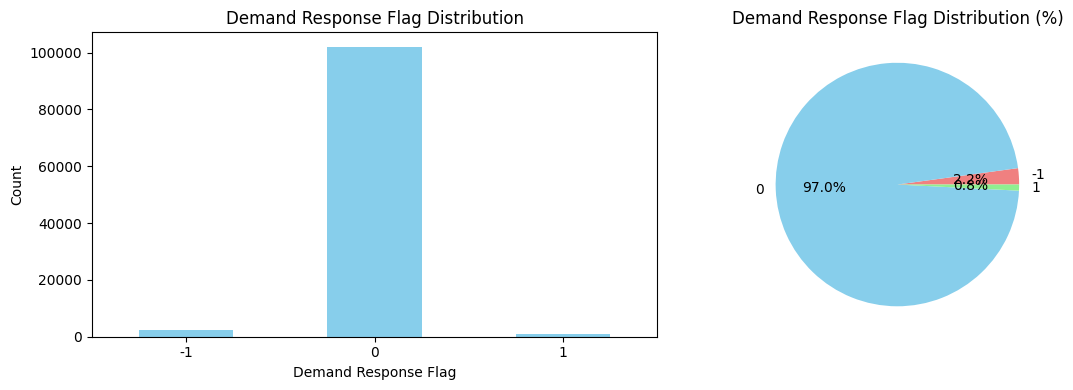

In [21]:
# Visualize target variable distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot
flag_counts.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Demand Response Flag Distribution')
ax1.set_xlabel('Demand Response Flag')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=0)

# Pie chart
flag_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%', colors=['lightcoral', 'skyblue', 'lightgreen'])
ax2.set_title('Demand Response Flag Distribution (%)')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

In [23]:
# Analyze target variable by site
print("Demand Response Flag by Site:")
site_flag_crosstab = pd.crosstab(df['Site'], df['Demand_Response_Flag'], margins=True)
print(site_flag_crosstab)

Demand Response Flag by Site:
Demand_Response_Flag    -1       0    1     All
Site                                           
siteA                  631   34269  140   35040
siteB                  676   33931  433   35040
siteC                  955   33811  274   35040
All                   2262  102011  847  105120


<Figure size 1000x600 with 0 Axes>

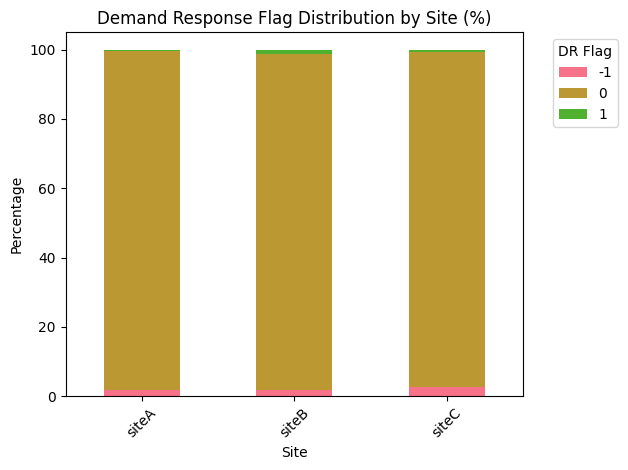

In [24]:
# Visualize by site
site_flag_crosstab_pct = pd.crosstab(df['Site'], df['Demand_Response_Flag'], normalize='index') * 100

plt.figure(figsize=(10, 6))
site_flag_crosstab_pct.plot(kind='bar', stacked=True)
plt.title('Demand Response Flag Distribution by Site (%)')
plt.xlabel('Site')
plt.ylabel('Percentage')
plt.legend(title='DR Flag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
# Analyze time patterns
# Extract time components
df['hour'] = df['Timestamp_Local'].dt.hour
df['day_of_week'] = df['Timestamp_Local'].dt.dayofweek  # 0=Monday
df['month'] = df['Timestamp_Local'].dt.month
df['day_of_year'] = df['Timestamp_Local'].dt.dayofyear

print("Time features extracted: hour, day_of_week, month, day_of_year")

Time features extracted: hour, day_of_week, month, day_of_year


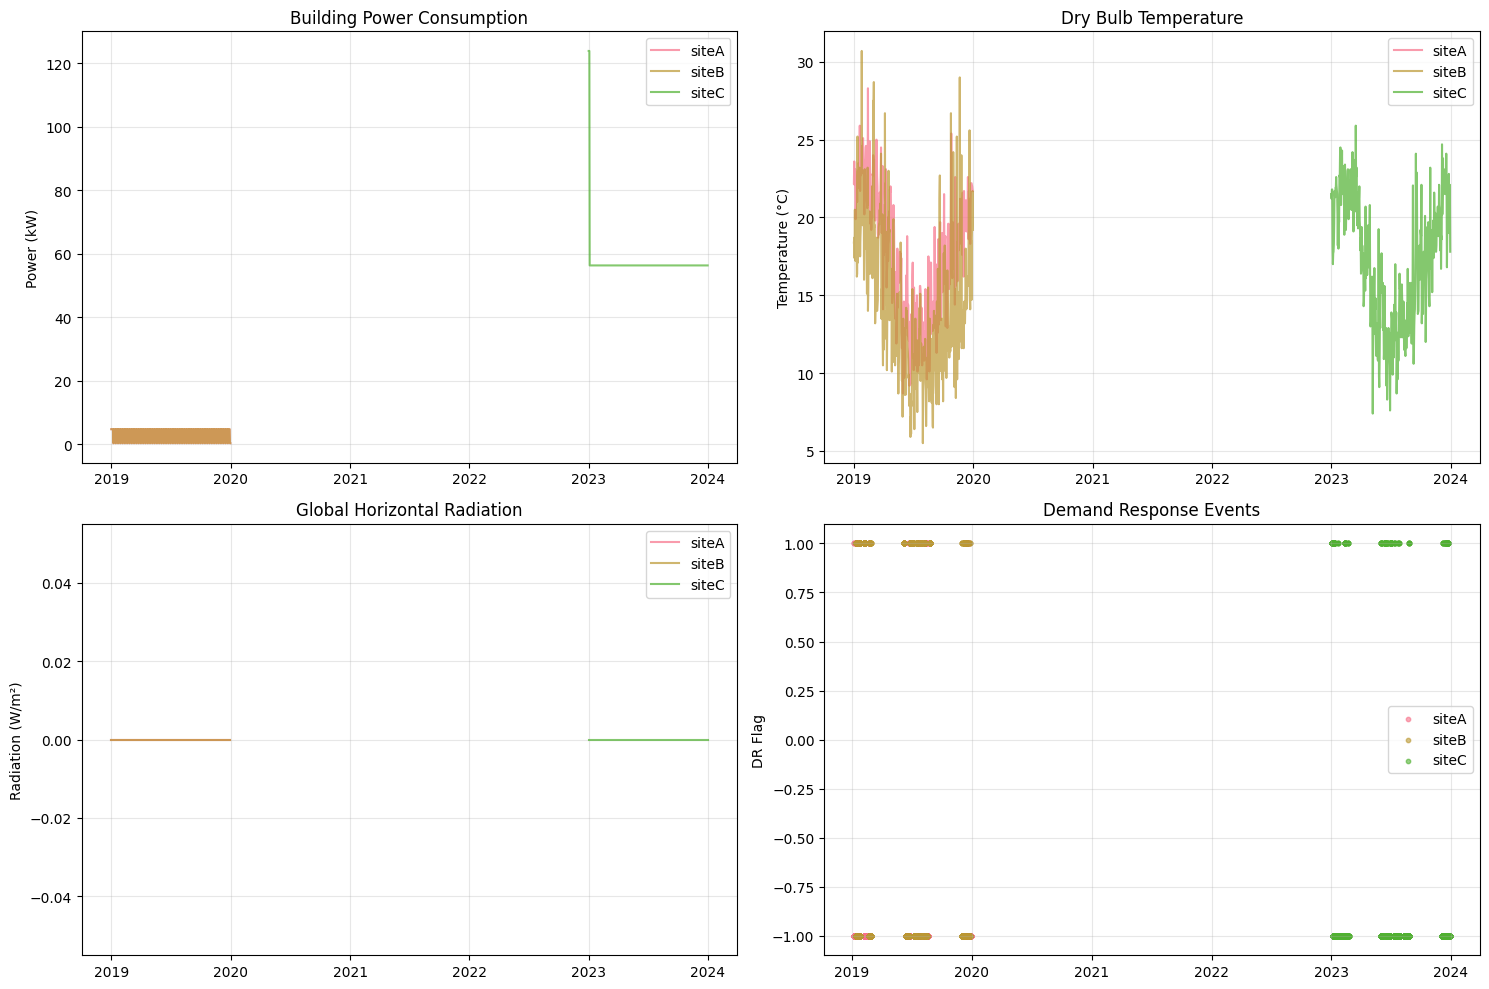

In [27]:
# Plot time series for each variable
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Sample data for visualization (every 24 hours to avoid overcrowding)
sample_df = df.iloc[::96]  # Every 24 hours (96 * 15min = 24h)

for site in df['Site'].unique():
    site_data = sample_df[sample_df['Site'] == site].sort_values('Timestamp_Local')
    
    axes[0,0].plot(site_data['Timestamp_Local'], site_data['Building_Power_kW'], 
                   label=site, alpha=0.7)
    axes[0,1].plot(site_data['Timestamp_Local'], site_data['Dry_Bulb_Temperature_C'], 
                   label=site, alpha=0.7)
    axes[1,0].plot(site_data['Timestamp_Local'], site_data['Global_Horizontal_Radiation_W/m2'], 
                   label=site, alpha=0.7)
    
# DR events
dr_events = df[df['Demand_Response_Flag'] != 0]
for site in df['Site'].unique():
    site_dr = dr_events[dr_events['Site'] == site]
    axes[1,1].scatter(site_dr['Timestamp_Local'], site_dr['Demand_Response_Flag'], 
                     label=f'{site}', alpha=0.6, s=10)

axes[0,0].set_title('Building Power Consumption')
axes[0,0].set_ylabel('Power (kW)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

axes[0,1].set_title('Dry Bulb Temperature')
axes[0,1].set_ylabel('Temperature (°C)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

axes[1,0].set_title('Global Horizontal Radiation')
axes[1,0].set_ylabel('Radiation (W/m²)')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

axes[1,1].set_title('Demand Response Events')
axes[1,1].set_ylabel('DR Flag')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

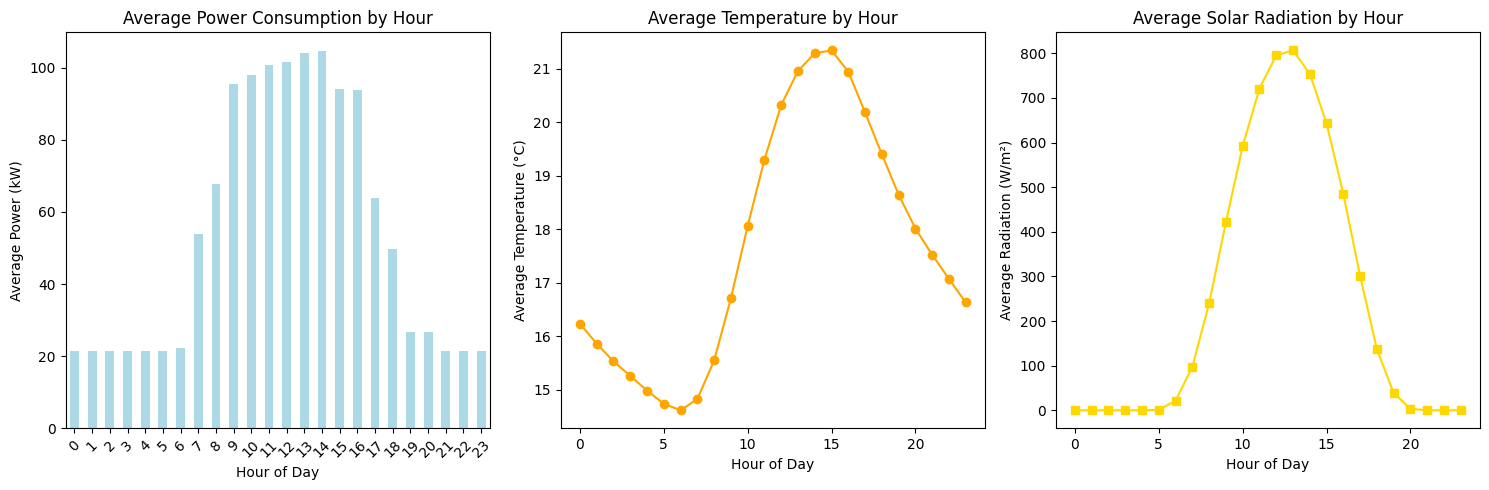

In [28]:
# Analyze daily patterns
# Power consumption by hour
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
hourly_power = df.groupby('hour')['Building_Power_kW'].mean()
hourly_power.plot(kind='bar', color='lightblue')
plt.title('Average Power Consumption by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Power (kW)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
hourly_temp = df.groupby('hour')['Dry_Bulb_Temperature_C'].mean()
hourly_temp.plot(kind='line', marker='o', color='orange')
plt.title('Average Temperature by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Temperature (°C)')

plt.subplot(1, 3, 3)
hourly_radiation = df.groupby('hour')['Global_Horizontal_Radiation_W/m2'].mean()
hourly_radiation.plot(kind='line', marker='s', color='gold')
plt.title('Average Solar Radiation by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Radiation (W/m²)')

plt.tight_layout()
plt.show()

Total Demand Response Events: 3109
Percentage of DR events: 2.96%


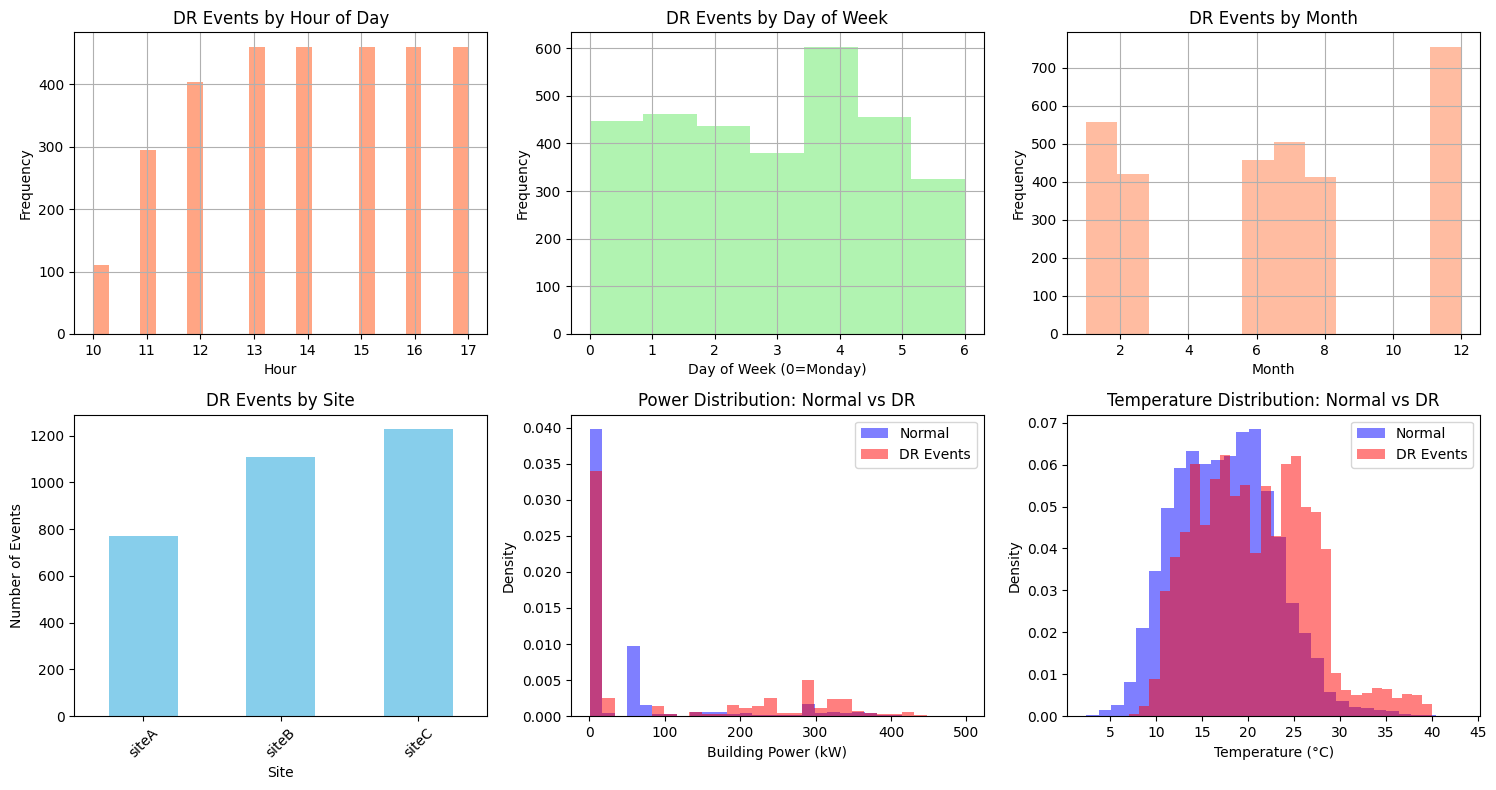

In [29]:
# Analyze demand response events in detail
dr_events = df[df['Demand_Response_Flag'] != 0].copy()

print(f"Total Demand Response Events: {len(dr_events)}")
print(f"Percentage of DR events: {len(dr_events)/len(df)*100:.2f}%")

if len(dr_events) > 0:
    plt.figure(figsize=(15, 8))
    
    plt.subplot(2, 3, 1)
    dr_events['hour'].hist(bins=24, alpha=0.7, color='coral')
    plt.title('DR Events by Hour of Day')
    plt.xlabel('Hour')
    plt.ylabel('Frequency')
    
    plt.subplot(2, 3, 2)
    dr_events['day_of_week'].hist(bins=7, alpha=0.7, color='lightgreen')
    plt.title('DR Events by Day of Week')
    plt.xlabel('Day of Week (0=Monday)')
    plt.ylabel('Frequency')
    
    plt.subplot(2, 3, 3)
    dr_events['month'].hist(bins=12, alpha=0.7, color='lightsalmon')
    plt.title('DR Events by Month')
    plt.xlabel('Month')
    plt.ylabel('Frequency')
    
    plt.subplot(2, 3, 4)
    dr_events.groupby('Site')['Demand_Response_Flag'].count().plot(kind='bar', color='skyblue')
    plt.title('DR Events by Site')
    plt.xlabel('Site')
    plt.ylabel('Number of Events')
    plt.xticks(rotation=45)
    
    plt.subplot(2, 3, 5)
    # Compare power consumption during normal vs DR events
    normal_power = df[df['Demand_Response_Flag'] == 0]['Building_Power_kW']
    dr_power = dr_events['Building_Power_kW']
    
    plt.hist(normal_power, bins=30, alpha=0.5, label='Normal', density=True, color='blue')
    plt.hist(dr_power, bins=30, alpha=0.5, label='DR Events', density=True, color='red')
    plt.title('Power Distribution: Normal vs DR')
    plt.xlabel('Building Power (kW)')
    plt.ylabel('Density')
    plt.legend()
    
    plt.subplot(2, 3, 6)
    # Compare temperature during normal vs DR events
    normal_temp = df[df['Demand_Response_Flag'] == 0]['Dry_Bulb_Temperature_C']
    dr_temp = dr_events['Dry_Bulb_Temperature_C']
    
    plt.hist(normal_temp, bins=30, alpha=0.5, label='Normal', density=True, color='blue')
    plt.hist(dr_temp, bins=30, alpha=0.5, label='DR Events', density=True, color='red')
    plt.title('Temperature Distribution: Normal vs DR')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Density')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [31]:
# Statistical summary by site
print("Statistical Summary by Site:")
print("-" * 30)
site_summary = df.groupby('Site').agg({
    'Building_Power_kW': ['mean', 'std', 'min', 'max'],
    'Dry_Bulb_Temperature_C': ['mean', 'std', 'min', 'max'],
    'Global_Horizontal_Radiation_W/m2': ['mean', 'std', 'min', 'max'],
    'Demand_Response_Flag': ['count', lambda x: (x != 0).sum()]
})

# Flatten column names
site_summary.columns = ['_'.join(col).strip() for col in site_summary.columns]
site_summary = site_summary.rename(columns={'Demand_Response_Flag_<lambda>': 'DR_Events_Count'})

print(site_summary)

Statistical Summary by Site:
------------------------------
       Building_Power_kW_mean  Building_Power_kW_std  Building_Power_kW_min  \
Site                                                                          
siteA                5.469840               3.765886                   0.40   
siteB                5.467368               3.932194                   0.40   
siteC              150.916557             116.135716                  56.33   

       Building_Power_kW_max  Dry_Bulb_Temperature_C_mean  \
Site                                                        
siteA                  34.92                    18.789837   
siteB                  31.70                    15.771590   
siteC                 497.91                    18.440220   

       Dry_Bulb_Temperature_C_std  Dry_Bulb_Temperature_C_min  \
Site                                                            
siteA                    5.037947                         6.3   
siteB                    5.749582          


Correlation Analysis:
--------------------


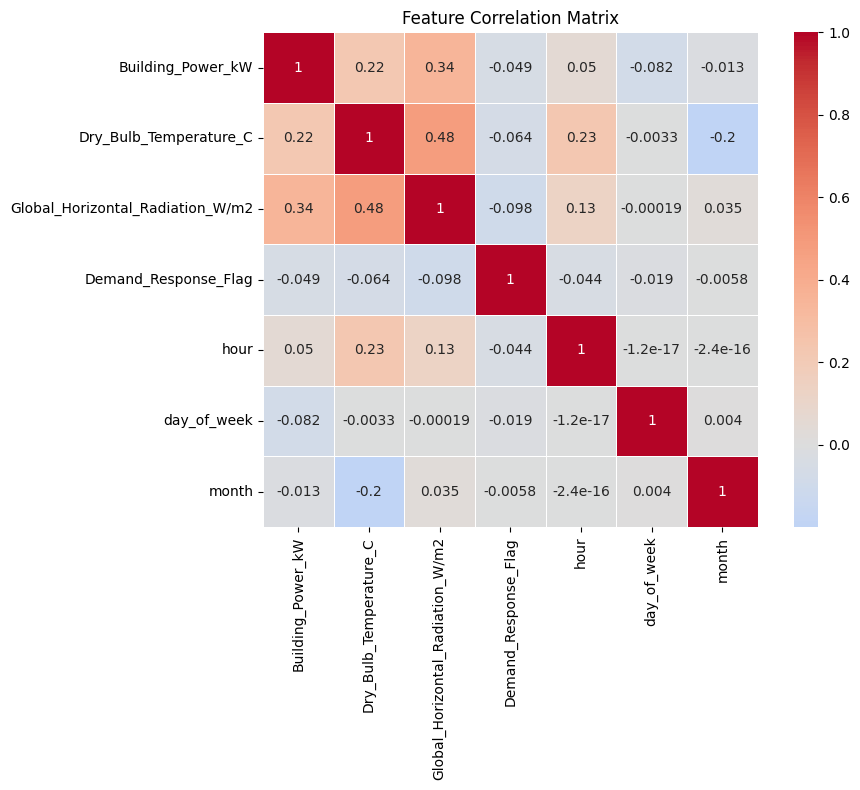

In [32]:
# Correlation analysis
print("\nCorrelation Analysis:")
print("-" * 20)

# Select numeric columns for correlation
numeric_cols = ['Building_Power_kW', 'Dry_Bulb_Temperature_C', 'Global_Horizontal_Radiation_W/m2', 
                'Demand_Response_Flag', 'hour', 'day_of_week', 'month']

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

Correlations with Demand_Response_Flag (absolute values):
Demand_Response_Flag                1.000000
Global_Horizontal_Radiation_W/m2    0.098280
Dry_Bulb_Temperature_C              0.063877
Building_Power_kW                   0.048757
hour                                0.044314
day_of_week                         0.018807
month                               0.005804
Name: Demand_Response_Flag, dtype: float64


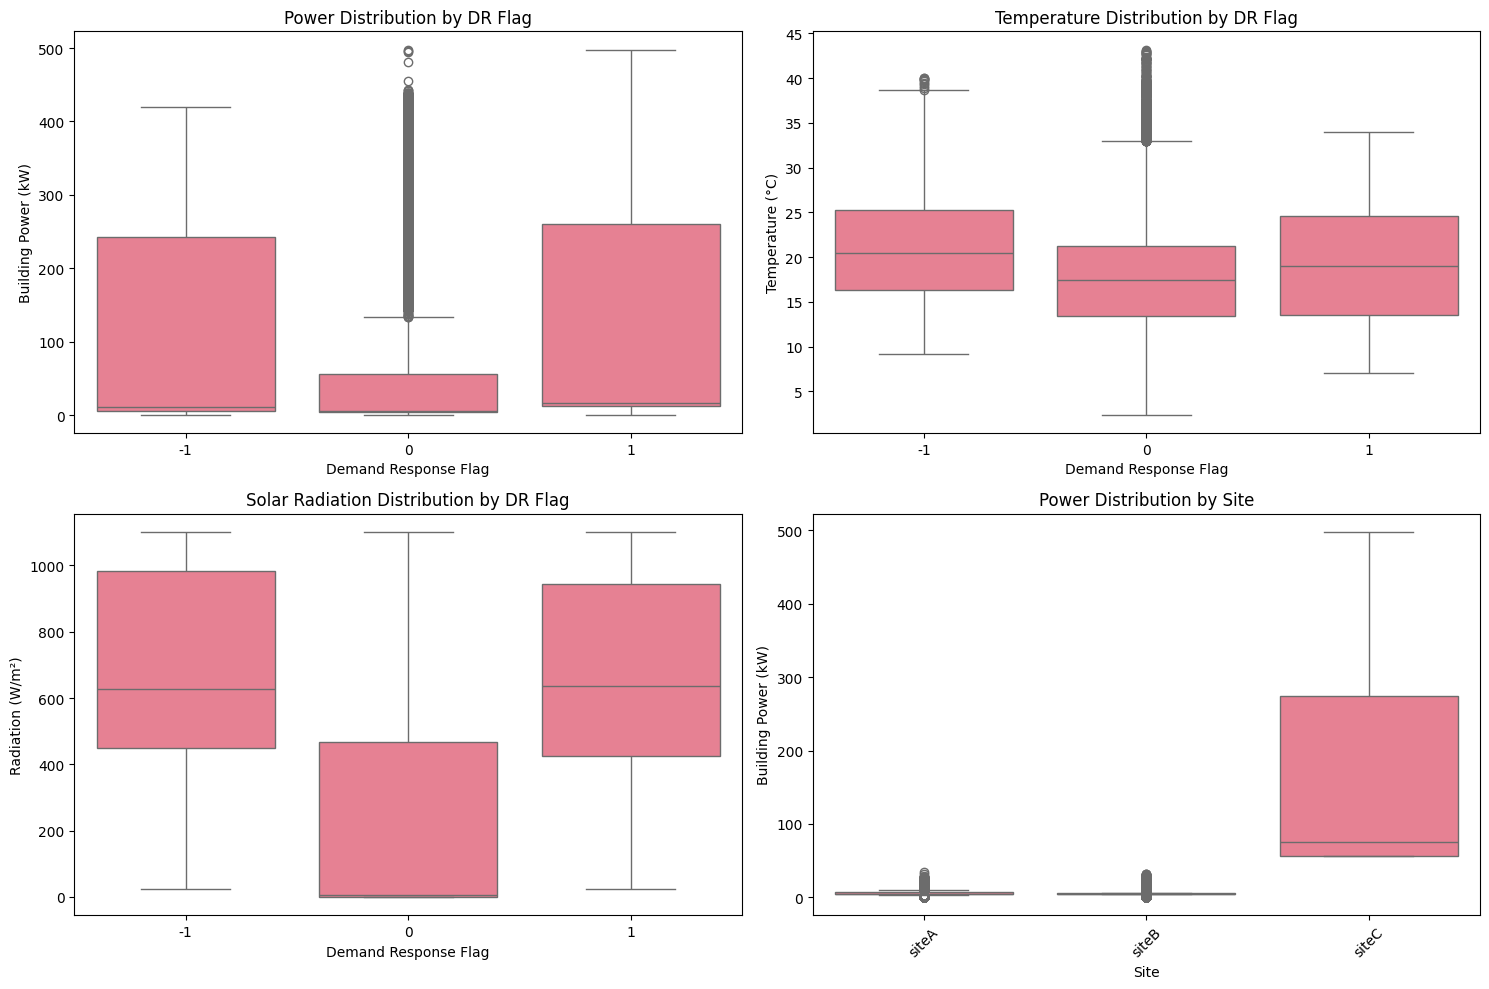

In [34]:
# Show correlations with target variable
target_corr = corr_matrix['Demand_Response_Flag'].abs().sort_values(ascending=False)
print("Correlations with Demand_Response_Flag (absolute values):")
print(target_corr)

# Box plots to compare distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Power by DR Flag
sns.boxplot(data=df, x='Demand_Response_Flag', y='Building_Power_kW', ax=axes[0,0])
axes[0,0].set_title('Power Distribution by DR Flag')
axes[0,0].set_xlabel('Demand Response Flag')
axes[0,0].set_ylabel('Building Power (kW)')

# Temperature by DR Flag
sns.boxplot(data=df, x='Demand_Response_Flag', y='Dry_Bulb_Temperature_C', ax=axes[0,1])
axes[0,1].set_title('Temperature Distribution by DR Flag')
axes[0,1].set_xlabel('Demand Response Flag')
axes[0,1].set_ylabel('Temperature (°C)')

# Radiation by DR Flag
sns.boxplot(data=df, x='Demand_Response_Flag', y='Global_Horizontal_Radiation_W/m2', ax=axes[1,0])
axes[1,0].set_title('Solar Radiation Distribution by DR Flag')
axes[1,0].set_xlabel('Demand Response Flag')
axes[1,0].set_ylabel('Radiation (W/m²)')

# Power by Site
sns.boxplot(data=df, x='Site', y='Building_Power_kW', ax=axes[1,1])
axes[1,1].set_title('Power Distribution by Site')
axes[1,1].set_xlabel('Site')
axes[1,1].set_ylabel('Building Power (kW)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
